In [60]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pylab as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


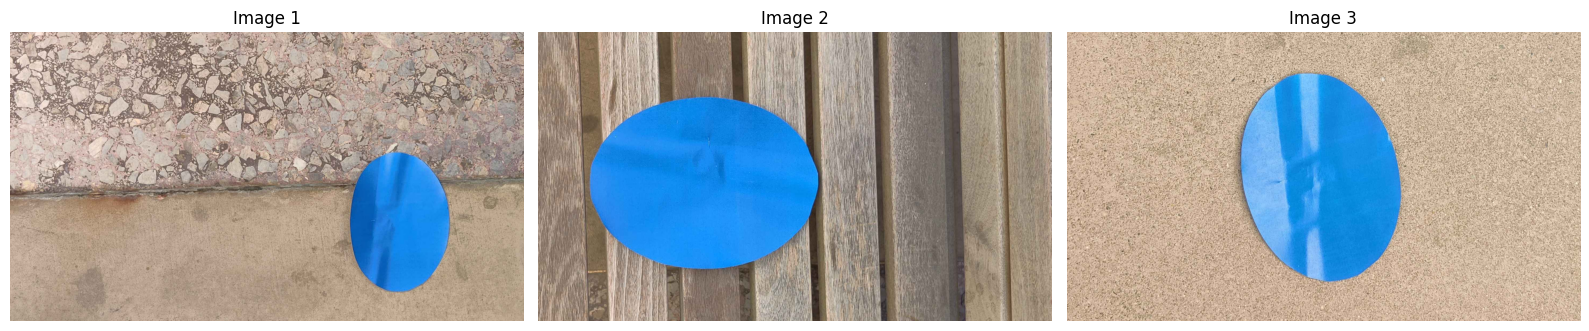

In [61]:
# Replace this prefix with whatever directory has all of your pictures
prefix = '/content/drive/MyDrive/Onboarding 2025'

img1 = cv2.imread(prefix + '/i1 (1).jpg')
img2 = cv2.imread(prefix + '/i2 (1).jpg')
img3 = cv2.imread(prefix + '/i3 (1).jpg')


'''
Resize and convert BGR to RGB for each image
The original images are too high quality and take too long to load, so we downscale them
'''

# Now you can create the list of images
img_list = [img1, img2, img3]

# This plot is to make it easy for you to see all the images you are working with
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes = axes.ravel()

# Loop through the images and plot them, converting from BGR to RGB for plotting only
for i in range(3):
    axes[i].imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB here for plotting
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [62]:
final_images = []
blurred_arr = []
sobel_arr = []

for idx, img in enumerate(img_list):
    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Median blur
    filtered = cv2.medianBlur(img_rgb, ksize=25)

    blurred_arr.append(filtered)

    # Convert to HSV
    hsv = cv2.cvtColor(filtered, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:, :, 2]

    # Sobel edge detection
    sobel_x = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(v_channel, cv2.CV_64F, 0, 1, ksize=3)
    gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)
    if idx == 0:
      edge_threshold = 25  # Adjust this threshold as needed
    if idx == 1:
      edge_threshold = 31  # Adjust this threshold as needed
    if idx == 2:
      edge_threshold = 20  # Adjust this threshold as needed
    edges = np.zeros_like(v_channel, dtype=np.uint8)
    edges[gradient_mag > edge_threshold] = 255
    sobel_arr.append(edges)

    sobel_arr.append(edges)

    # Find largest contour
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    contour_mask = np.zeros_like(edges)
    cv2.drawContours(contour_mask, [largest_contour], -1, 255, cv2.FILLED)

    # Erode mask
    kernel = np.ones((9, 9), np.uint8)
    eroded_mask = cv2.erode(contour_mask, kernel, iterations=1)

    # Apply mask
    final_image = cv2.bitwise_and(img_rgb, img_rgb, mask=eroded_mask)
    final_images.append(final_image)


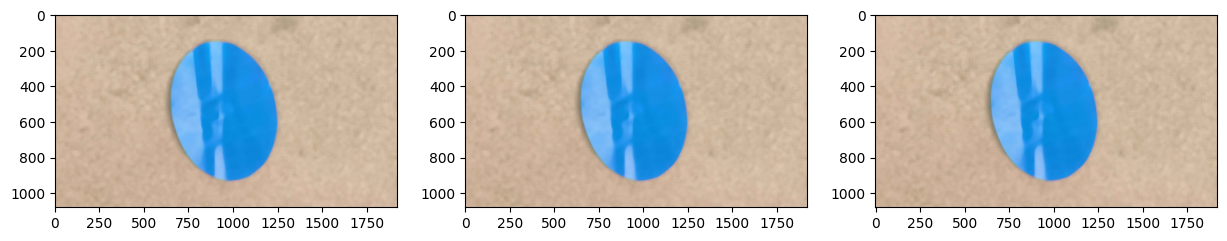

In [63]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(blurred_arr[i])

plt.show()

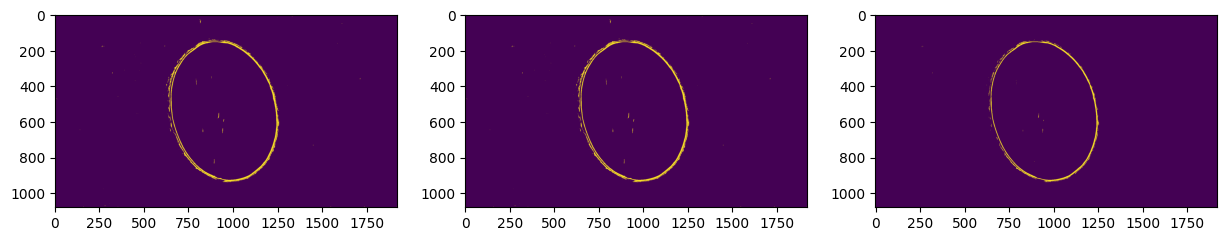

In [64]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sobel_arr[i])

plt.show()

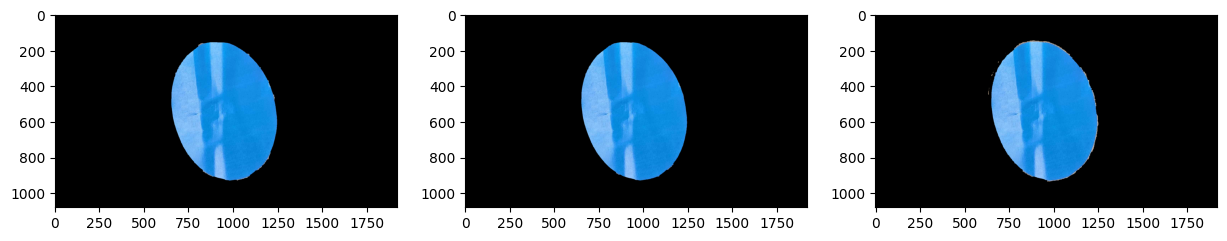

In [65]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(final_images[i])

plt.show()

In [66]:
def get_coords(img):
  blurred = cv2.GaussianBlur(img, (9, 9), 0)
  hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

  lower_blue = (100, 70, 0)
  upper_blue = (120, 255, 255)

  blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

  contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  largest_contour = max(contours, key=cv2.contourArea)

  M = cv2.moments(largest_contour)
  if M['m00'] != 0:
      cX = int(M['m10'] / M['m00'])
      cY = int(M['m01'] / M['m00'])
      x_dim = np.shape(blue_mask)[1]
      y_dim = np.shape(blue_mask)[0]
      x_dist = cX - x_dim/2
      y_dist = cY - y_dim/2
  else:
      x_dist, y_dist = 0, 0
  return x_dist, y_dist

In [67]:
# Run this code block when you think you have a solution and want to check it but do not modify this block
correct_coords = [
    (493.0, 169.0),
    (-340.0, 24.0),
    (-13.0, 1.0)
]

def assert_coords_within_range(your_coords, correct_coords):
    tolerance = 50
    for i, (your_x, your_y) in enumerate(your_coords):
        correct_x, correct_y = correct_coords[i]

        assert abs(your_x - correct_x) <= tolerance, f"X coordinate for image {i+1} out of range: got {your_coords}, expected {correct_x}"
        assert abs(your_y - correct_y) <= tolerance, f"Y coordinate for image {i+1} out of range: got {your_coords}, expected {correct_y}"

        print(f"Image {i+1}: Coordinates are within the acceptable range.")

your_coords = [get_coords(img) for img in img_list]

assert_coords_within_range(your_coords, correct_coords)

Image 1: Coordinates are within the acceptable range.
Image 2: Coordinates are within the acceptable range.
Image 3: Coordinates are within the acceptable range.
